In [143]:
import numpy as np
import matplotlib.pyplot as plt
import scipy


In [144]:
radar_data = np.load('data_driven_data/radars_2020-11-01_2022-12-31.npy')
glorys     = np.load('data_driven_data/glorys_2020-11-01_2022-12-31.npy')
gfs = np.load('data_driven_data/gfs_2020-11-01_2022-12-31.npy')


In [145]:
print('radar data : ', radar_data.shape)
print('glorys data :', glorys.shape)
print('gfs data :', gfs.shape)

radar data :  (791, 825, 200)
glorys data : (791, 3, 825, 200)
gfs data : (791, 3, 825, 200)


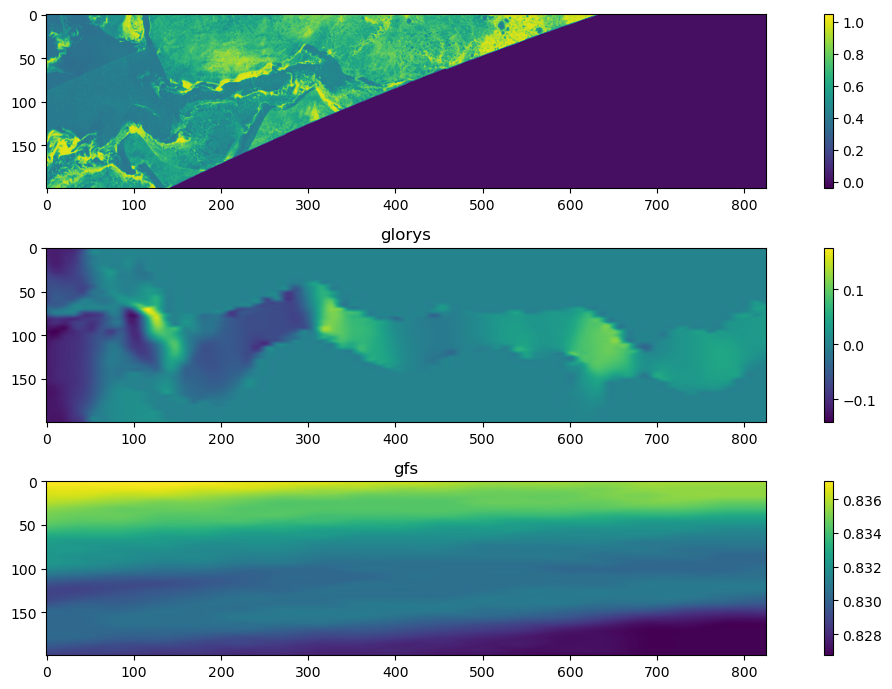

In [146]:
idx = 0
plt.figure(figsize=(12,7)); plt.subplot(3,1,1)
plt.imshow(radar_data[idx].T); plt.colorbar()
plt.subplot(3,1,2)
plt.imshow(glorys[idx,0].T); plt.title('glorys')
plt.colorbar();plt.subplot(3,1,3)
plt.imshow(gfs[idx,0].T); plt.title('gfs');plt.colorbar()
plt.tight_layout()


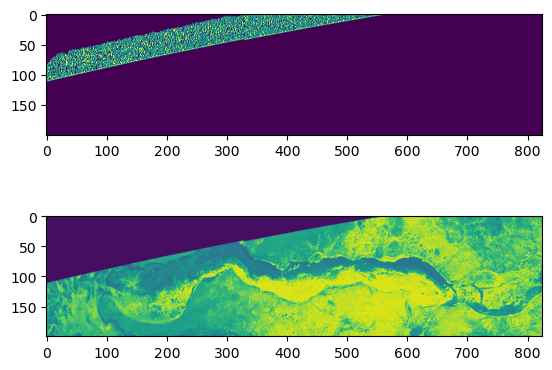

In [125]:

idx = 23
plt.subplot(2,1,2)
plt.imshow(radar_data[idx].T)
plt.subplot(2,1,1)
plt.imshow(radar_data[idx].T < 0)